## Método de Newton-Raphson para raices múltiples


Que sucede cuando las raices son múltiples? 

Recordemos que una función contínua $f(x)$ tiene una raíz múltiple de orden $m$ en $x=x_0$ si en un entorno de ese punto se puede escribir como,

$$
f(x) = (x-x_0)^m * q(x) \;\;\;\;\;\; q(x_0) \neq 0, \;\; \text{contínua}.
$$



Que pasa por ejemplo si queremos resolver para `f(x) = (x-2)^2*x`?

In [22]:
f(x) = (x^2-2)^2*x
df(x) = 4x^2*(x^2-2) + (x^2-2)^2

df (generic function with 1 method)

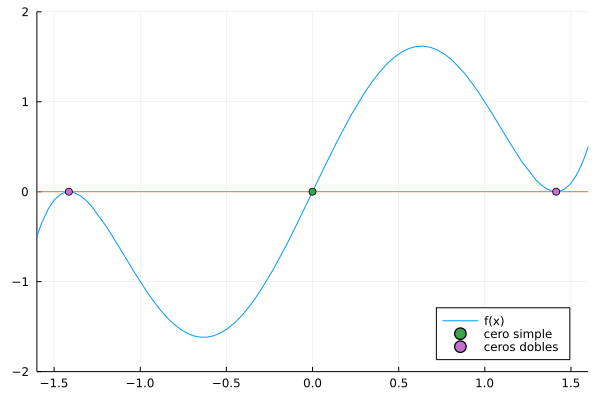

In [56]:
using Plots
plot(f,xlim=(-1.6,1.6),ylim=(-2,2),label="f(x)")
hline!([0], label="", legend=:bottomright)
scatter!([0],[0],label="cero simple")
scatter!([-sqrt(2),sqrt(2)],[0,0], label="ceros dobles")


Recordemos el método:

$$
x_{i+1} = x_{i} - \frac{f(x_i)}{f'(x_i)}.
$$

Cerca de la raíz tenemos un cociente de cantidades que se van haciendo más y más pequeñas. Usamos la función NR e imprimimos el error de cada paso:

In [23]:
function NR(f,df,x₀,tolₓ=1.e-7,tol_f=1.e-7,max_iter=100)#x₀::tipo, tolₓ::tipo=1.e-7,tol_f::tipo=1.e-7,max_iter::Int64=100)
    x = x₀
    iter = 0
    Er = zeros(max_iter)
    dx = 1.
    while (abs(dx/x) > tolₓ) || (abs(f(x)) > tol_f) && iter < max_iter
        iter = iter + 1
        dx = f(x)/df(x)
        x = x - dx
        Er[iter] = abs(dx/x)
    end
    return (f(x), x, Er[1:iter])
end

NR (generic function with 4 methods)

In [24]:
(fv, x, Er_d) = NR(f,df,1.1);

In [25]:
Er_d

21-element Vector{Float64}:
 0.16322314049586767
 0.03933698867834641
 0.017021416656470993
 0.008008614826140788
 0.003892579723890187
 0.0019198325334147072
 0.0009534732680698377
 0.00047514655612063513
 0.00023717829789428972
 0.00011849071858551955
 5.9220790868199e-5
 2.96042582131462e-5
 1.4800595411309451e-5
 7.399914358037586e-6
 3.6998613516489564e-6
 1.8499067201650468e-6
 9.249473713354867e-7
 4.624721884720374e-7
 2.3123571995592322e-7
 1.1561776642893987e-7
 5.780885979948209e-8

**El método converge pero mucho más lentamente!**

Recuerden el enunciado del Teorema que vimos anteriormente:


**Teorema de convergencia del método de Newton-Raphson:**

*Sea $f(x)$ y $[a,b]$ un intervalo tal que:*

1. *$f(x)$ está definida en dicho intervalo y es dos veces contínuamente diferenciable en el mismo. (Derivada segunda existe y es contínua). $f \in C^2[a,b]$.*
    
2. *Existe un cero de $f$ en dicho intervalo, es decir, $\exists p \in [a,b] \;\; t.q. \;\; f(p)=0$.*

3. *En dicho cero la derivada de $f$ no se anula, es decir, $f'(p) \neq 0$*

*Entonces existe $\delta > 0$ tal que si $x_0 \in [p-\delta, p+\delta]$ luego la sucesión generada por el método de Newton-Raphson con valor inicial $x_0$, $\{x_i\}$ converge a $p$.* *(es decir dado $\epsilon > 0$ arbitrario, existe $n$ tal que $|x_i - p| < \epsilon \;\; \forall \; i > n$)*

Ahora hacemos lo mismo con una función con el mismo cero, pero que tiene un polo simple:

In [26]:
fs(x) = (x^2-2)*x
dfs(x) = 2x^2 + (x^2-2)

dfs (generic function with 1 method)

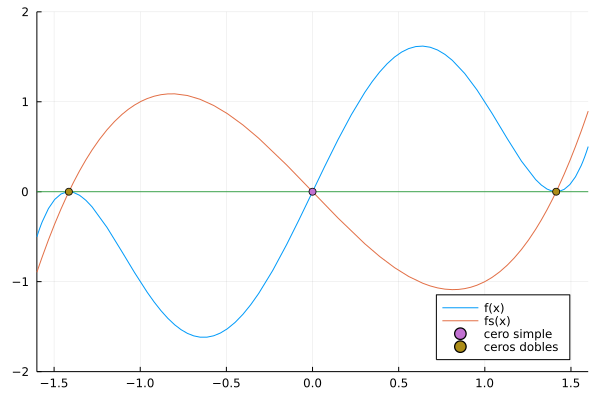

In [58]:
plot(f,xlim=(-1.6,1.6),ylim=(-2,2),label="f(x)")
plot!(fs,label="fs(x)")
hline!([0], label="", legend=:bottomright)
scatter!([0],[0],label="cero simple")
scatter!([-sqrt(2),sqrt(2)],[0,0], label="ceros dobles")

Para este caso el método de Newton converge rápidamente tal como lo indica el teorema.

In [27]:
(fv, x, Er_s) = NR(fs,dfs,1.1);

In [28]:
Er_s

6-element Vector{Float64}:
 0.3264462809917354
 0.12506230381002967
 0.02541691669840699
 0.0009854493094233864
 1.4576224920799805e-6
 3.1870062144686604e-12

## Solución: 

Sea $f(x)$ dos veces contínuamente diferenciable y con raíz de orden $m$ en $x=x_0$. Consideremos la función 

$$
r(x) = \frac{f(x)}{f'(x)}.
$$

Luego, usando que en un entorno de $x_0$ existe $m$ y $q(x)$ tal que,

$$
f(x) = (x-x_0)^m q(x) \;\;\;\;\;\;\; f'(x) = m\;(x-x_0)^{m-1} q(x) + (x-x_0)^m q'(x)
$$

Tenemos que 

$$
r(x) = \frac{(x-x_0)^m q(x)}{m\;(x-x_0)^{m-1} q(x) + (x-x_0)^m q'(x)} = \frac{(x-x_0)\;q(x)}{m\;q(x) + (x-x_0)\;q'(x)}
$$

La cual tiene un cero simple en $x_0$. En efecto, cuando $x \to x_0$ el segundo término del denominador tiende a cero (ya que $q'(x)$ es contínua y por lo tanto acotada en el intervalo) y en el límite se comporta como,

$$
r(x) \approx \frac{(x-x_0)}{m}
$$

Se puede ver que su derivada por lo tanto se comporta como $\frac{1}{m} \neq 0$ (suponiendo que $q''$ es contínua). 

**Por lo tanto podemos usar $r$ para encontrar el cero!**

Notemos también que:

$$
r' = (\frac{f}{f'})' = \frac{f'}{f'} - \frac{ff''}{f'^2} = 1 - \frac{ff''}{f'^2}
$$

Para el ejemplo visto, $f(x) = (x^2-2)^2*x$,

$$
f'(x) = 5x^4 - 12x^2 + 2 \;\;\;\;\;\; f''(x) = 20x^3 - 24x
$$


In [70]:
ddf(x) = 20x^3 - 24x

r(x) = f(x)/df(x)
dr(x) = 1 - f(x)*ddf(x)/df(x)^2

dr (generic function with 1 method)

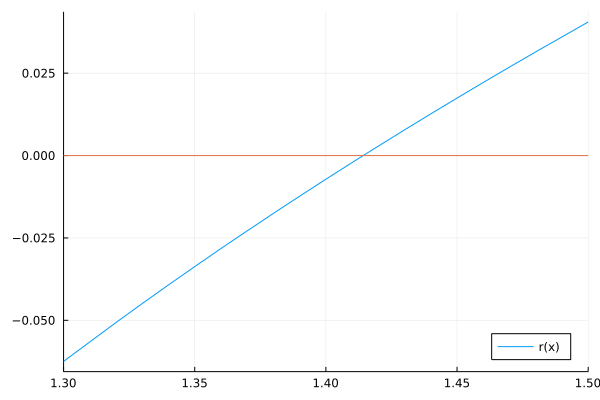

In [71]:
plot(r,xlim=(1.3,1.5), legend=:bottomright, label="r(x)")
hline!([0], label="")

In [72]:
(rv, x, Er_r) = NR(r,dr,1.1);

In [73]:
Er_r

5-element Vector{Float64}:
 0.16526342975206607
 0.0633652563889982
 0.005122549652291266
 2.671841863150762e-5
 7.1394057307211e-10